# Shardul Nazirkar
Github - shardul1704
# Detecting Breast Cancer using Supervised, Semi-supervised, Unsupervised Learning Methods
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

## Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np 
import statistics
import random as rand
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import SpectralClustering
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, f1_score ,auc,roc_curve
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

## 1. (a) Importing the dataset

In [19]:
df= pd.read_csv('../data/wdbc.data',header=None)
df.columns=['IDs','Diagnosis']+['f'+str(i+1) for i in range(df.shape[1]-2)]
df_x = df.drop(['IDs','Diagnosis'],axis=1)
df_x_normalize = pd.DataFrame(preprocessing.normalize(df_x))
df = pd.concat([df[['Diagnosis']],df_x_normalize],axis=1)

df["Diagnosis"] = df["Diagnosis"].map( {'M':0, 'B':1} )

df_malignant_only = df['Diagnosis'] == 0
df_malignant = df[df_malignant_only]
df_malignant_20_test = df_malignant.sample(frac=.20,random_state=rand.randint(0,100))

df_benign_only = df['Diagnosis'] == 1
df_benign = df[df_benign_only]
df_benign_20_test= df_benign.sample(frac=.20,random_state=rand.randint(1,100))

In [20]:
test_df = pd.concat([df_malignant_20_test,df_benign_20_test]) 
index1 = test_df.index
train_df = df.drop(index= index1)

In [21]:
X_train = train_df.drop(['Diagnosis'],axis=1)
y_train = train_df['Diagnosis']
X_test = test_df.drop(['Diagnosis'],axis=1)
y_test = test_df['Diagnosis']

## 1. (a) (b) i. Monte-Carlo simulation - Supervised Learning

In [22]:
precision_train,recall_train,fscore_train,AUC_train,accuracy_sc_train=[],[],[],[],[]
precision_test,recall_test,fscore_test,AUC_test,accuracy_sc_test=[],[],[],[],[]

for m in range(0,30):
   
    parameters = [{'C': [1, 10, 100, 1000, 10000]}]   
    clf = GridSearchCV(LinearSVC(penalty='l1',dual=False),parameters,cv=5)
    clf.fit(X_train, y_train)
    pred_y_train = clf.predict(X_train)
    precision_train.append(precision_score(y_train, pred_y_train))
    recall_train.append(recall_score(y_train, pred_y_train))
    accuracy_sc_train.append(accuracy_score(y_train, pred_y_train)) 
    fscore_train.append(f1_score(y_train,pred_y_train))
    fpr_train, tpr_train, _ = roc_curve(y_train,pred_y_train)
    AUC_train.append(auc(fpr_train, tpr_train))
    
    parameters = [{'C': [1, 10, 100, 1000, 10000]}]   
    clf = GridSearchCV(LinearSVC(penalty='l1',dual=False),parameters,cv=5)
    clf.fit(X_train, y_train)
    pred_y = clf.predict(X_test)
    precision_test.append(precision_score(y_test, pred_y))
    recall_test.append(recall_score(y_test, pred_y))
    accuracy_sc_test.append(accuracy_score(y_test, pred_y)) 
    fscore_test.append(f1_score(y_test, pred_y))
    fpr_test, tpr_test, _ = roc_curve(y_test,pred_y)
    AUC_test.append(auc(fpr_test, tpr_test))
    
print("Results for Train set")
avg_precision_train = statistics.mean(precision_train)
avg_f1score_train = statistics.mean(fscore_train)
avg_recall_train = statistics.mean(recall_train)
avg_accuracy_Score_train= statistics.mean(accuracy_sc_train)
print("Avg_Precision : {}\nAvg_F1-score : {}\nAvg_recall : {}\nAvg_accuracy_score : {}".format(avg_precision_train,avg_f1score_train,avg_recall_train,avg_accuracy_Score_train))
print("\n")
print("Results for Test set")
avg_precision_test = statistics.mean(precision_test)
avg_f1score_test = statistics.mean(fscore_test)
avg_recall_test = statistics.mean(recall_test)
avg_accuracy_Score_test = statistics.mean(accuracy_sc_test)
print("Avg_Precision : {}\nAvg_F1-score : {}\nAvg_recall : {}\nAvg_accuracy_score : {}".format(avg_precision_test,avg_f1score_test,avg_recall_test,avg_accuracy_Score_test))


Results for Train set
Avg_Precision : 0.9834967320261437
Avg_F1-score : 0.9882862192597082
Avg_recall : 0.9931235431235431
Avg_accuracy_score : 0.985233918128655


Results for Test set
Avg_Precision : 0.9583333333333334
Avg_F1-score : 0.965034965034965
Avg_recall : 0.971830985915493
Avg_accuracy_score : 0.9557522123893806


Test Area under the curve


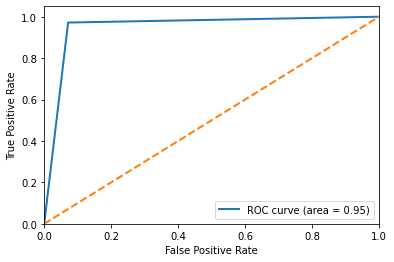

In [23]:
print("Test Area under the curve")
plt.plot(fpr_test, tpr_test,lw=2, label='ROC curve (area = %0.2f)' %auc(fpr_test, tpr_test))
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

Train Area under the curve


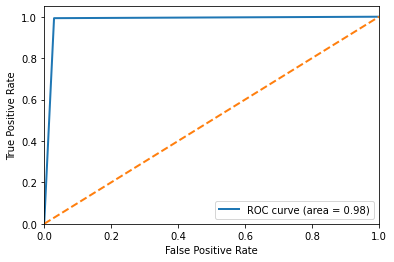

In [24]:
print("Train Area under the curve")
plt.plot(fpr_train, tpr_train,lw=2, label='ROC curve (area = %0.2f)' %auc(fpr_train, tpr_train))
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [26]:
conf = confusion_matrix(y_test,pred_y)
print("Confusion Matrix Test: ")
print(conf)

conf_tr = confusion_matrix(y_train,pred_y_train)
print("Confusion Matrix Test: ")
print(conf_tr)

Confusion Matrix Test: 
[[39  3]
 [ 2 69]]
Confusion Matrix Test: 
[[165   5]
 [  2 284]]


## 1. (b) ii. Semi-supervised learning

In [3]:
precision_train,recall_train,fscore_train,AUC_train,accuracy_sc_train=[],[],[],[],[]
precision_test,recall_test,fscore_test,AUC_test,accuracy_sc_test=[],[],[],[],[]

for m in range(0,30):
    print(m)
    df_malignant_filter = df['Diagnosis'] == 0
    df_malignant = df[df_malignant_filter]
    df_malignant_20_test = df_malignant.sample(frac=.50,random_state=rand.randint(0,100))
    df_benign_filter = df['Diagnosis'] == 1
    df_benign = df[df_benign_filter]
    df_benign_20_test= df_benign.sample(frac=.50,random_state=rand.randint(1,100))
    
    test_df = pd.concat([df_malignant_20_test,df_benign_20_test]) 
    index1 = test_df.index
    train_df = df.drop(index= index1)
    label_df = train_df
    
    unlabeled_df = test_df.drop('Diagnosis',axis=1)
    unlabeled_df_y = test_df['Diagnosis']
    unlabeled_df_final =unlabeled_df.reset_index(drop=True)
    unlabeled_df = unlabeled_df_final
    
    labeled_x = train_df.drop(['Diagnosis'],axis=1)
    labeled_x = labeled_x.reset_index(drop=True)
    labeled_y=train_df['Diagnosis']
    labeled_y=labeled_y.reset_index(drop=True)
    labeled_x_final = train_df.drop(['Diagnosis'],axis=1)
    labeled_x_final = labeled_x_final.reset_index(drop=True)
    labeled_y_final=train_df['Diagnosis']
    labeled_y_final=labeled_y_final.reset_index(drop=True)
    
    for un in range(len(unlabeled_df)):
        parameters = [{'C': [0.1,0.001,1, 10, 100, 1000],'max_iter':[2000]}]
        clf = GridSearchCV(LinearSVC(penalty='l1',dual=False),parameters,cv=5)
        clf.fit(labeled_x,labeled_y)
        l = int(np.argmax(clf.decision_function(unlabeled_df)))
        max_dist_val = pd.Series.to_frame(unlabeled_df.iloc[l,:]).T
        pred_app = pd.DataFrame(clf.predict(max_dist_val))
        labeled_y = pd.concat([labeled_y,pred_app],axis=0)
        labeled_x = labeled_x.append(max_dist_val)
        unlabeled_df = unlabeled_df.drop(index=l,axis=0)
        unlabeled_df = unlabeled_df.reset_index(drop=True)
    
    pred_final = clf.predict(unlabeled_df_final)
    precision_test.append(precision_score(unlabeled_df_y, pred_final))
    recall_test.append(recall_score(unlabeled_df_y,pred_final))
    accuracy_sc_test.append(accuracy_score(unlabeled_df_y, pred_final)) 
    fscore_test.append(f1_score(unlabeled_df_y, pred_final))
    fpr, tpr, _ = roc_curve(unlabeled_df_y,pred_final)
    AUC_test.append(auc(fpr, tpr))
    
    pred_final_train=clf.predict(labeled_x_final)
    precision_train.append(precision_score(labeled_y_final, pred_final_train))
    recall_train.append(recall_score(labeled_y_final,pred_final_train))
    accuracy_sc_train.append(accuracy_score(labeled_y_final, pred_final_train)) 
    fscore_train.append(f1_score(labeled_y_final, pred_final_train))
    fpr_tr, tpr_tr, _ = roc_curve(labeled_y_final,pred_final_train)
    AUC_train.append(auc(fpr_tr, tpr_tr))

print("Train Values")
print("avg  precision score: ",statistics.mean(precision_train))
print("avg  f1 score: ",statistics.mean(fscore_train))
print("avg  recall score: ",statistics.mean(recall_train))
print("avg AUC score: ",statistics.mean(AUC_train))
print("avg acuracy score: ",statistics.mean(accuracy_sc_train))
print("TEST values")
print("avg precision score: ",statistics.mean(precision_test))
print("avg f1 score: ",statistics.mean(fscore_test))
print("avg recall score: ",statistics.mean(recall_test))
print("avg AUC score: ",statistics.mean(AUC_test))
print("avg acuracy score: ",statistics.mean(accuracy_sc_test))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
Train Values
avg  precision score:  0.9633090567916686
avg  f1 score:  0.9720966716503162
avg  recall score:  0.9811918063314711
avg AUC score:  0.9588348968764273
avg acuracy score:  0.964561403508772
TEST values
avg precision score:  0.939620446213728
avg f1 score:  0.9580053289706174
avg recall score:  0.9775280898876404
avg AUC score:  0.9354621581513675
avg acuracy score:  0.9461267605633803


Test Area under the curve


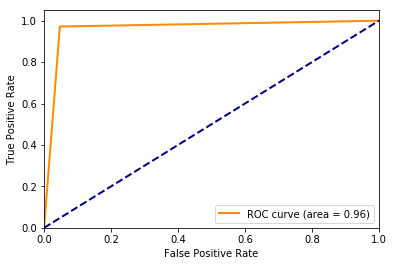

In [5]:
print("Test Area under the curve")
plt.plot(fpr, tpr,lw=2, label='ROC curve (area = %0.2f)' %auc(fpr, tpr))
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

Train Area under the curve


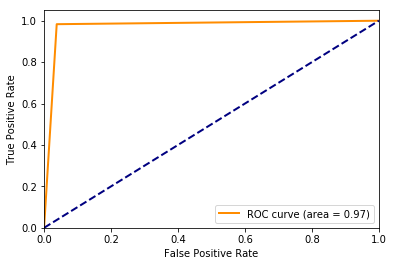

In [7]:
print("Train Area under the curve")
plt.plot(fpr_tr, tpr_tr,lw=2, label='ROC curve (area = %0.2f)' %auc(fpr_tr, tpr_tr))
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [11]:
conf = confusion_matrix(unlabeled_data_y, pred_final)
print("Confusion Matrix test: ")
print(conf)

conf_tr = confusion_matrix(labeled_y_final, pred_final_train)
print("Confusion Matrix train: ")
print(conf_tr)

Confusion Matrix test: 
[[ 90  16]
 [  6 172]]
Confusion Matrix train: 
[[ 99   7]
 [  3 176]]


## 1. (b) iii. Unsupervised Learning

In [8]:
precision_train,recall_train,fscore_train,AUC_train,accuracy_sc_train=[],[],[],[],[]
precision_test,recall_test,fscore_test,AUC_test,accuracy_sc_test=[],[],[],[],[]

for m in range(0,30):

    kmeans=KMeans(n_clusters=2,init='k-means++',n_init=5,random_state=rand.randint(0,100))
    kmeans.fit(X_train)
    nbrs = NearestNeighbors(n_neighbors=30, algorithm='ball_tree').fit(X_train)
    distances, indices = nbrs.kneighbors(kmeans.cluster_centers_)
    
    y_train = y_train.reset_index(drop=True)
    clus0= y_train.loc[indices[0]]
    poll0=clus0.value_counts()
    clus1=y_train.loc[indices[1]]
    poll1=clus1.value_counts()
    
    pred_y = kmeans.labels_
    pred_y=pd.DataFrame(pred_y)
    pred_y0=pred_y[pred_y[0]==0]
    pred_y1=pred_y[pred_y[0]==1]

    max_index_0=np.argmax(poll0)
    max_index_1=np.argmax(poll1)

    pred_y0['class']=max_index_0
    pred_y1['class']=max_index_1
    pred_y_tr=pd.concat([pred_y0['class'],pred_y1['class']],axis=0)
    pred_y_tr=pred_y_tr.sort_index()

    precision_train.append(precision_score(y_train, pred_y_tr))
    recall_train.append(recall_score(y_train, pred_y_tr))
    accuracy_sc_train.append(accuracy_score(y_train, pred_y_tr)) 
    fscore_train.append(f1_score(y_train, pred_y_tr))
    fpr_tr, tpr_tr, _ = roc_curve(y_train,pred_y_tr)
    AUC_train.append(auc(fpr_tr, tpr_tr))
    
    pred_y_test = kmeans.predict(test_x)
    precision_test.append(precision_score(y_test, pred_y_test))
    recall_test.append(recall_score(y_test, pred_y_test))
    accuracy_sc_test.append(accuracy_score(y_test, pred_y_test)) 
    fscore_test.append(f1_score(y_test, pred_y_test))
    fpr, tpr, _ = roc_curve(y_test,pred_y_test)
    AUC_test.append(auc(fpr, tpr))

In [9]:
print("Train scores")
print("precision score: ",statistics.mean(precision_train))
print("f1 score: " ,statistics.mean(fscore_train))
print("recall score: ",statistics.mean(recall_train) )
print("AUC score: ",statistics.mean(AUC_train) )
print("accuracy score: ",statistics.mean(accuracy_sc_train) )
print("\nTest scores")
print("precision score: ",statistics.mean(precision_test) )
print("f1 score: ",statistics.mean(fscore_test) )
print("recall score: " ,statistics.mean(recall_test))
print("AUC score: " ,statistics.mean(AUC_test))
print("accuracy score: " ,statistics.mean(accuracy_sc_test))

Train scores
precision score: 0.5484201367287728
f1 score: 0.6210767846069476
recall score: 0.7286713286713287
AUC score: 0.6078650761003702
accuracy score: 0.6385964912280702

Test scores
precision score: 0.20932600421162503
f1 score: 0.20602395506508867
recall score: 0.21220657276995306
AUC score: 0.29062709590878605
accuracy score: 0.2705014749262537


Train Area under the curve


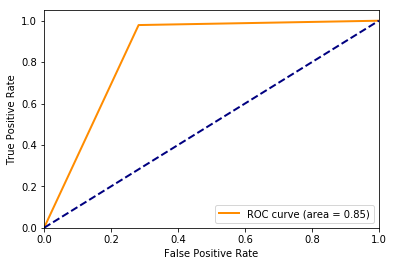

In [31]:
print("Train Area under the curve")
plt.plot(fpr_tr, tpr_tr,lw=2, label='ROC curve (area = %0.2f)' %auc(fpr_tr, tpr_tr))
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

Test Area under the curve


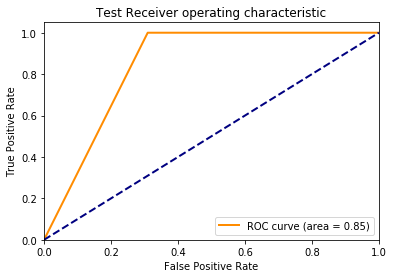

In [32]:
print("Test Area under the curve")
plt.plot(fpr, tpr,lw=2, label='ROC curve (area = %0.2f)' %auc(fpr, tpr))
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Receiver operating characteristic')
plt.legend()
plt.show()

In [15]:
conf = confusion_matrix(y_test, pred_y_test)
print("Confusion Matrix test: ")
print(conf)

conf_tr = confusion_matrix(y_train, pred_y_tr)
print("Confusion Matrix train: ")
print(conf_tr)

Confusion Matrix test: 
[[274  11]
 [ 25 145]]
Confusion Matrix train: 
[[70  2]
 [ 6 36]]


## 1. (b) iv. Spectral Clustering

Spectral clustering is a technique with roots in graph theory, where the approach is used to identify communities of nodes in a graph based on the edges connecting them. The method is flexible and allows us to cluster non graph data as well.

In [51]:
precision_train,recall_train,fscore_train,AUC_train,accuracy_sc_train=[],[],[],[],[]
precision_test,recall_test,fscore_test,AUC_test,accuracy_sc_test=[],[],[],[],[]

for m in range(0,30):
    sc=SpectralClustering(n_clusters=2,affinity='rbf',n_init=5,random_state=rand.randint(0,100)).fit(X_train)
    speclabels = pd.DataFrame(sc.labels_)
    label0= speclabels[speclabels[0]==0].index 
    label1=speclabels[speclabels[0]==1].index
    
    cluster0=X_train.iloc[label0,:]
    cluster1=X_train.iloc[label1,:]
    
    center0=cluster0.mean(axis=0)
    center1=cluster1.mean(axis=0)
    centers = pd.DataFrame()
    centers[0] = center0
    centers[1] = center1
    
    neigh = NearestNeighbors(n_neighbors=30,algorithm='brute').fit(X_train)
    distances, indices = neigh.kneighbors(centers.T)
    
    clus0= y_train.loc[indices[0]]
    poll0=clus0.value_counts()  
    clus1=y_train.loc[indices[1]]
    poll1=clus1.value_counts()
    
    pred_y = sc.labels_
    pred_y=pd.DataFrame(pred_y)
    pred_y0=pred_y[pred_y[0]==0]
    pred_y1=pred_y[pred_y[0]==1]
    
    max_index_0=np.argmax(poll0)
    max_index_1=np.argmax(poll1)
    
    pred_y0['class']=max_index_0
    pred_y1['class']=max_index_1
    pred_y_tr=pd.concat([pred_y0['class'],pred_y1['class']],axis=0)
    pred_y_tr=pred_y_tr.sort_index()
    
    precision_train.append(precision_score(y_train, pred_y_tr))
    recall_train.append(recall_score(y_train, pred_y_tr))
    accuracy_sc_train.append(accuracy_score(y_train, pred_y_tr)) 
    fscore_train.append(f1_score(y_train, pred_y_tr))
    fpr_tr, tpr_tr, _ = roc_curve(y_train,pred_y_tr)
    AUC_train.append(auc(fpr_tr, tpr_tr))
    
    pred_y_test = sc.fit_predict(X_test)
    precision_test.append(precision_score(y_test, pred_y_test))
    recall_test.append(recall_score(y_test, pred_y_test))
    accuracy_sc_test.append(accuracy_score(y_test, pred_y_test)) 
    fscore_test.append(f1_score(y_test, pred_y_test))
    fpr, tpr, _ = roc_curve(y_test,pred_y_test)
    AUC_test.append(auc(fpr, tpr))

In [16]:
print("Train scores")
print("precision score: ",statistics.mean(precision_train))
print("f1 score: " ,statistics.mean(fscore_train))
print("recall score: ",statistics.mean(recall_train) )
print("AUC score: ",statistics.mean(AUC_train) )
print("accuracy score: ",statistics.mean(accuracy_sc_train) )
print("\nTest scores")
print("precision score: ",statistics.mean(precision_test) )
print("f1 score: ",statistics.mean(fscore_test) )
print("recall score: " ,statistics.mean(recall_test))
print("AUC score: " ,statistics.mean(AUC_test))
print("accuracy score: " ,statistics.mean(accuracy_sc_test))

Train scores
precision score: 0.5869568063551421
f1 score: 0.6454033456366358
recall score: 0.7273892773892774
AUC score: 0.6261456190867956
accuracy score: 0.6519005847953216

Test scores
precision score: 0.3476325170255673
f1 score: 0.357024949460168
recall score: 0.3751173708920188
AUC score: 0.4125586854460094
accuracy score: 0.40294985250737464


In [16]:
print("Train scores")
print("precision score: ",statistics.mean(precision_train))
print("f1 score: " ,statistics.mean(fscore_train))
print("recall score: ",statistics.mean(recall_train) )
print("AUC score: ",statistics.mean(AUC_train) )
print("accuracy score: ",statistics.mean(accuracy_sc_train) )
print("\nTest scores")
print("precision score: ",statistics.mean(precision_test) )
print("f1 score: ",statistics.mean(fscore_test) )
print("recall score: " ,statistics.mean(recall_test))
print("AUC score: " ,statistics.mean(AUC_test))
print("accuracy score: " ,statistics.mean(accuracy_sc_test))

Train scores
precision score: 0.5869568063551421
f1 score: 0.6454033456366358
recall score: 0.7273892773892774
AUC score: 0.6261456190867956
accuracy score: 0.6519005847953216

Test scores
precision score: 0.3476325170255673
f1 score: 0.357024949460168
recall score: 0.3751173708920188
AUC score: 0.4125586854460094
accuracy score: 0.40294985250737464


Train Area under the curve


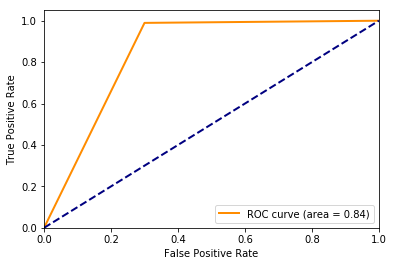

In [53]:
print("Train Area under the curve")
plt.plot(fpr_tr, tpr_tr,lw=2, label='ROC curve (area = %0.2f)' %auc(fpr_tr, tpr_tr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

Test Area under the curve


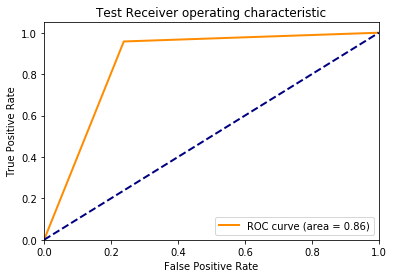

In [54]:
print("Test Area under the curve")
plt.plot(fpr, tpr,lw=2, label='ROC curve (area = %0.2f)' %auc(fpr, tpr))
plt.plot([0, 1], [0, 1],lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Receiver operating characteristic')
plt.legend()

In [55]:
conf = confusion_matrix(test_y, pred_y_test)
print("Confusion Matrix test: ")
print(conf)

conf_tr = confusion_matrix(train_y, pred_y_tr)
print("Confusion Matrix train: ")
print(conf_tr)

Confusion Matrix test: 
[[32 10]
 [ 3 68]]
Confusion Matrix train: 
[[119  51]
 [  3 283]]


From the above results we can see that as expected Supervised learning performs the best for our dataset. However, Semi-Supervised also performs only slightly worse. Performances of Unsupervised and Spectral clustering are similar but much worse that Supervised and Semi-Supervised.